<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/visualize_pore_types_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

orginal image
img.shape (642, 503, 3)
gray image
gray image.shape (642, 503)
the binary image
binary shape (642, 503)
len main contours 126


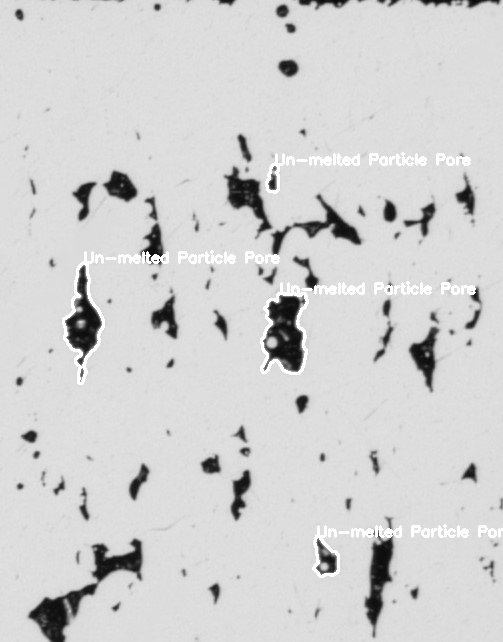

In [3]:
## load the training image
from skimage.io import imread, imshow
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time
from google.colab.patches import cv2_imshow

img_org = cv2.imread('/content/new_cropped_001.jpg')
#img_org = img_org[:, 300:1600]  ## croped image used with only our data images
print('orginal image')
print('img.shape',img_org.shape)
#cv2_imshow(img_org)

img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
print('gray image')
print('gray image.shape',img.shape)
#cv2_imshow(img)

# Threshold the image to obtain binary image
ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   ## check from here
# Find contours in the binary image
print('the binary image')
print('binary shape', binary.shape)
#cv2_imshow(binary)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('len main contours', len(contours))
max_cnt = max(contours, key = cv2.contourArea)

count_no_child = []
count_with_child = []
# Loop through each contour
for i, cnt in enumerate(contours):
    rect = cv2.minAreaRect(cnt)
    area = cv2.contourArea(cnt)
    hierarchy_entry = hierarchy[0][i] ## new line

    # max_cnt = max(contours, key=cv2.contourArea)
    max_area = cv2.contourArea(max_cnt)

    if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
      #print('len main contours without max and min area', len(contours))
      # if hierarchy_entry[2] == -1: # Check if the contour is a pore (no child contours)
      if hierarchy[0][i][2] == -1 and (hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1): # Check if the contour is a pore (no child contours)
        count_no_child.append(1)
        (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
        aspect_ratio = max(w, h) / min(w, h)
        #print("aspect ratio", aspect_ratio)
        perimeter = cv2.arcLength(cnt, True)
        pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
        #print("pore_circularities", pore_circularities)
        # Get the shape of the contour
        if pore_circularities >=  0.80:
          annotation = 1 # Gas pore (circle) red color
          # cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)
          # cv2.putText(img, 'Gas Pore', (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        elif aspect_ratio >= 3.5 and pore_circularities <  0.35:
          annotation = 2 # (1) Label as a crack (line) green color
          # cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)
          # cv2.putText(img, 'Crack Pore', (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        else:
          annotation = 3  # blue color
          # cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)
          # cv2.putText(img, 'Other Defects', (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
      else: # Check if the contour is a pore (with child contours)
        if hierarchy[0][i][1] != -1 or hierarchy[0][i][0] != -1:  # if it is not the child
          #print('iam in child pores')
          count_with_child.append(1)
          annotation = 4   # (220, 0, 220)
          cv2.drawContours(img, [cnt], 0, (255, 255, 0), 2)
          cv2.putText(img, 'Un-melted Particle Pore', (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
# Display the result
cv2_imshow(img)

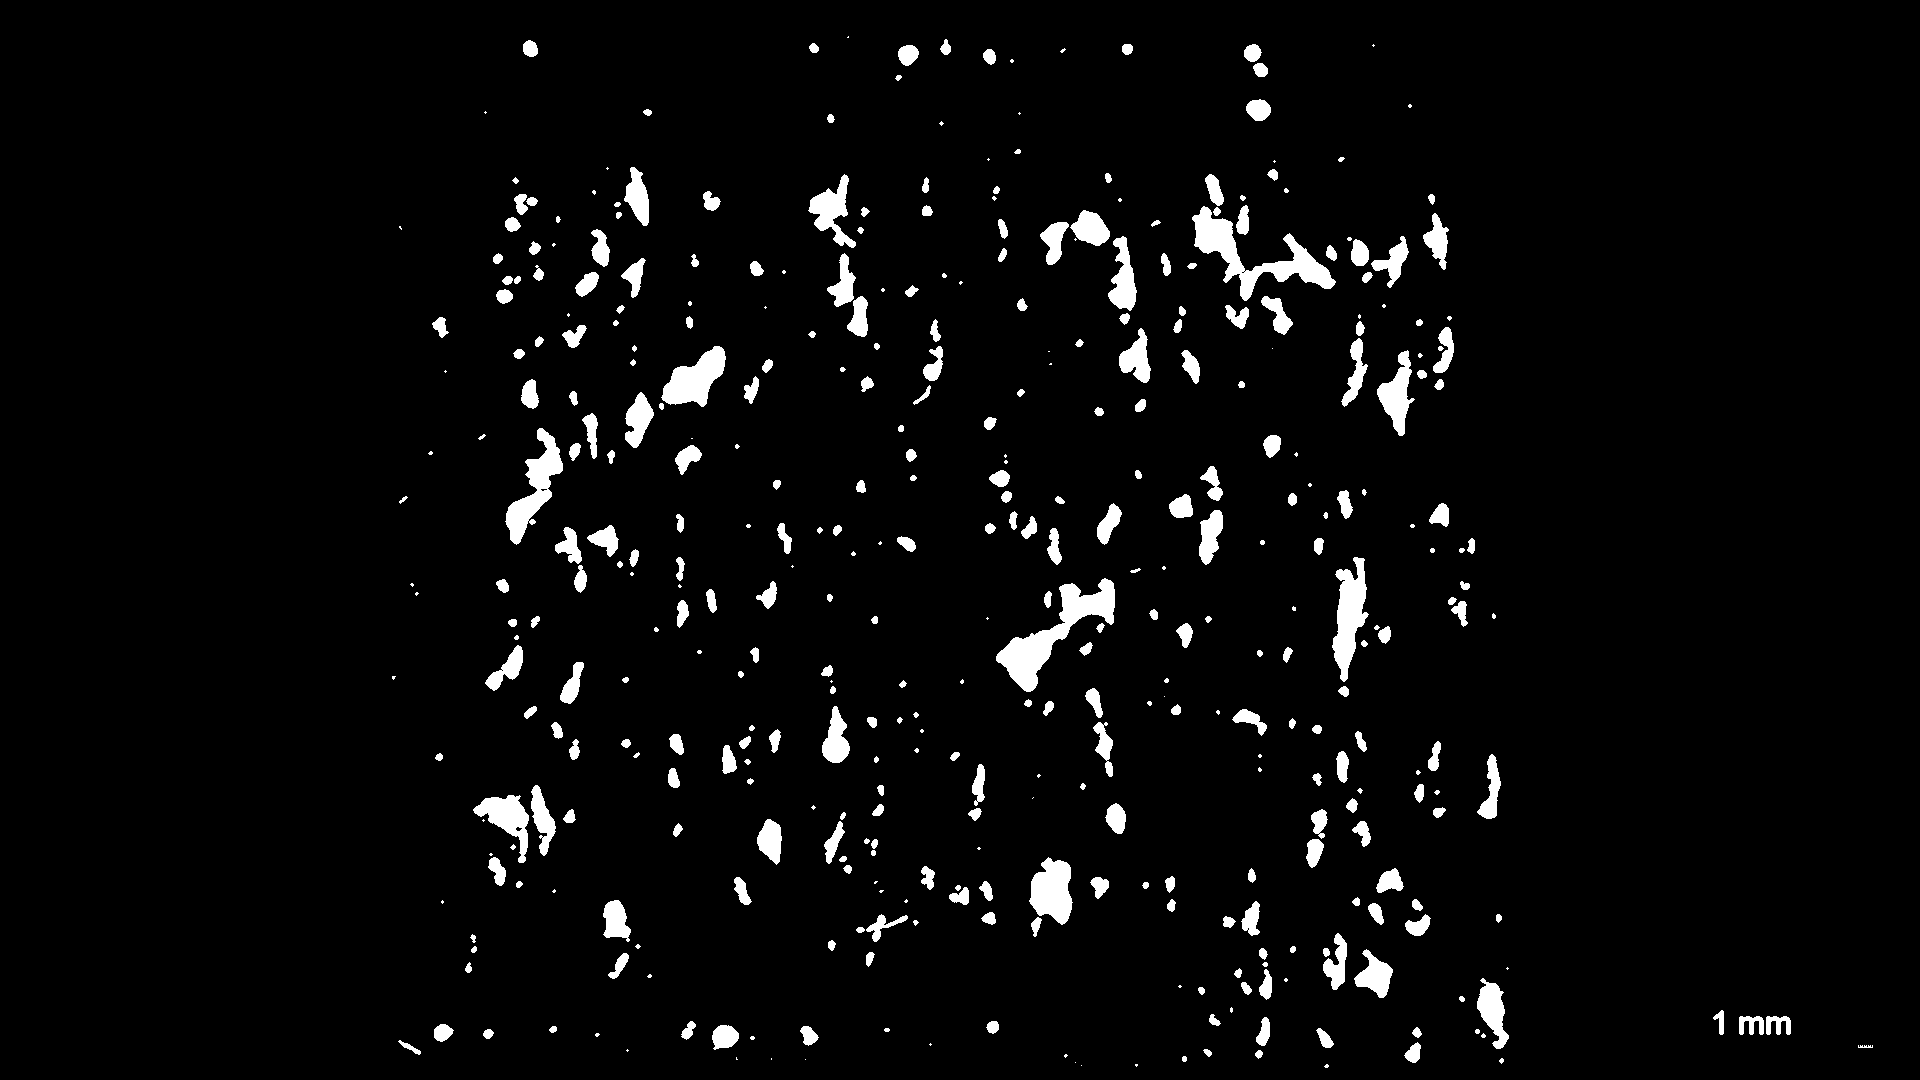

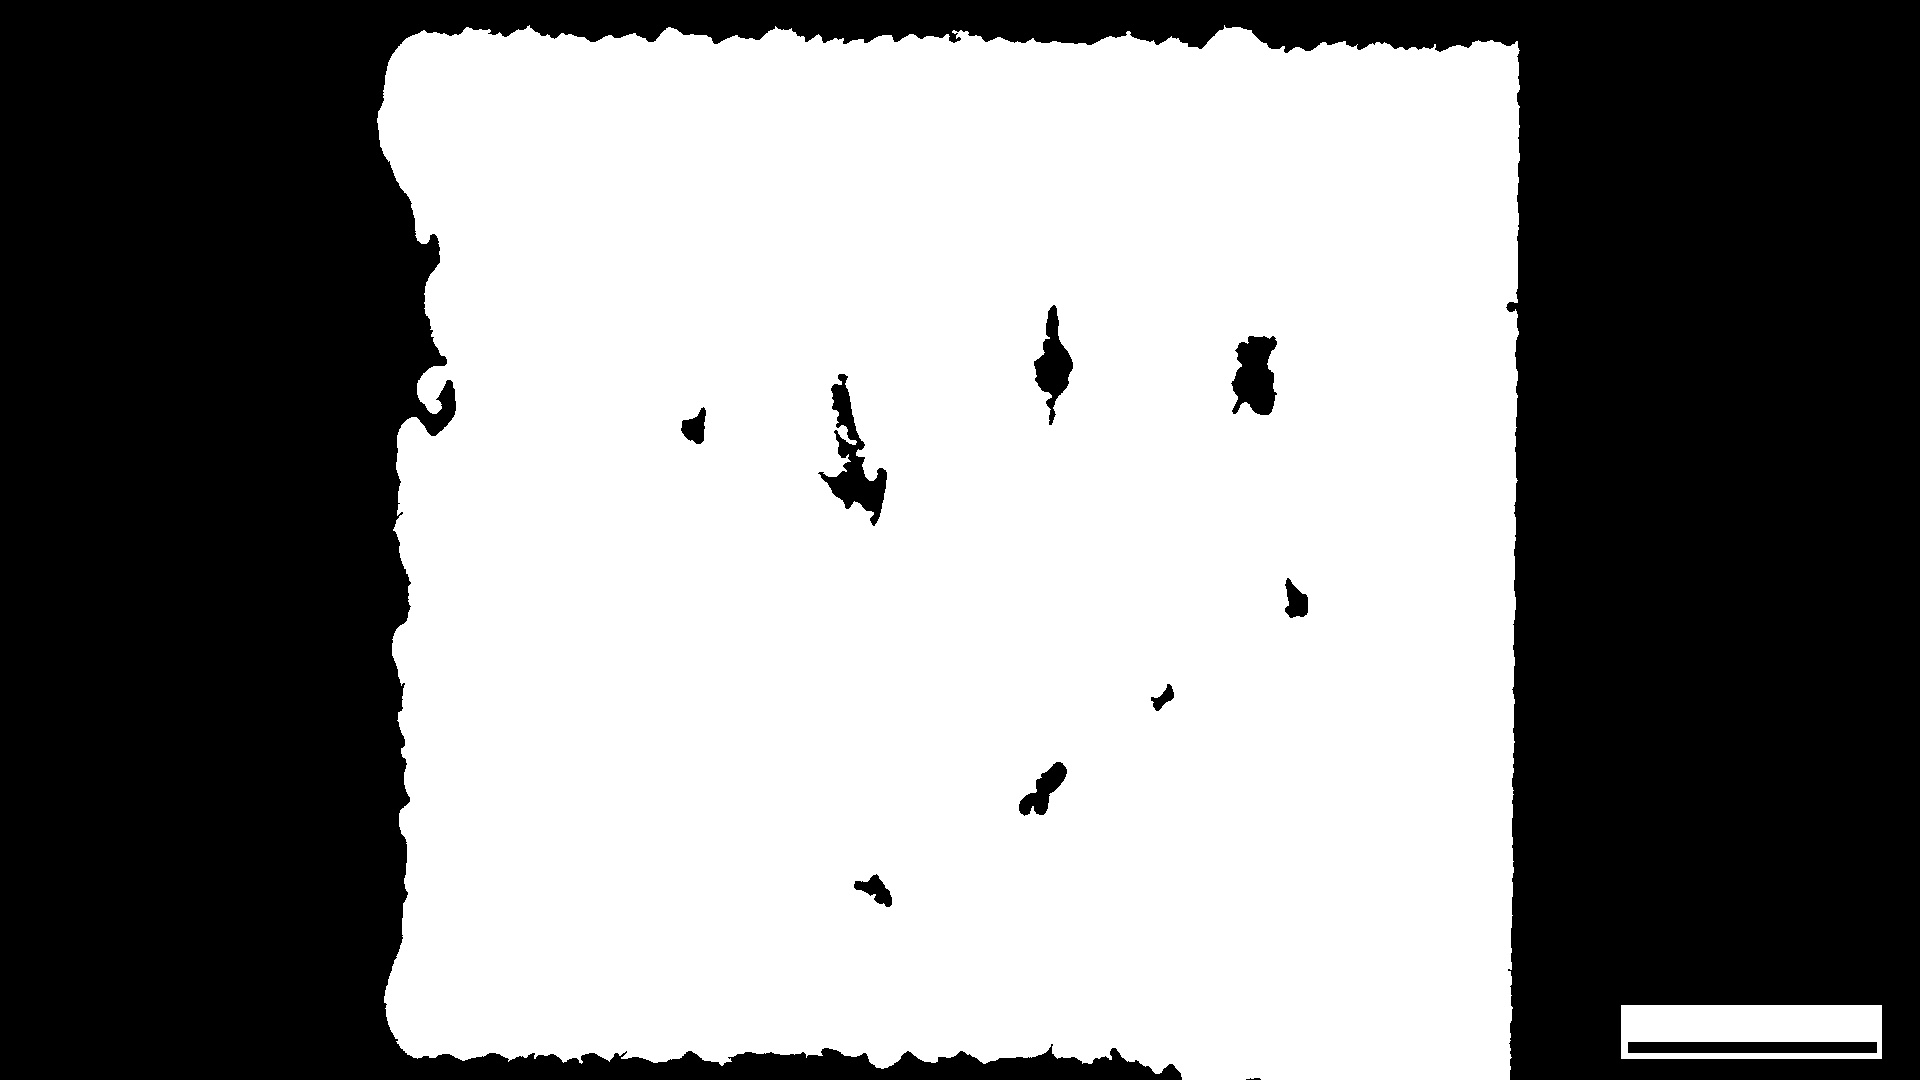

In [20]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/001.JPG', 0)  # Replace 'image.jpg' with the path to your image

# Apply thresholding to obtain a binary image
_, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

# Find contours and hierarchy in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create empty lists for pores with and without child pores
pores_with_child = []
pores_without_child = []

# Iterate over the contours
for i in range(len(contours)):
    contour = contours[i]
    #print('contour', contour)
    hierarchy_entry = hierarchy[0][i]

    # Check if the contour is a pore (no child contours)
    if hierarchy_entry[2] == -1:
        pores_without_child.append(contour)
    else:
        pores_with_child.append(contour)

# Create blank images for the two types of pores
pores_without_child_image = np.zeros_like(image)
pores_with_child_image = np.zeros_like(image)

# Draw contours of pores without child pores on the corresponding image
cv2.drawContours(pores_without_child_image, pores_without_child, -1, (255, 255, 255), thickness=cv2.FILLED)

# Draw contours of pores with child pores on the corresponding image
cv2.drawContours(pores_with_child_image, pores_with_child, -1, (255, 255, 255), thickness=cv2.FILLED)

# Display Pores without Child Pores
cv2_imshow(pores_without_child_image)
# Display Pores with Child Pores
cv2_imshow(pores_with_child_image)